# Technical test Ticatrip

This notebook is for analyzing Ticatrip data and to extract some relevant information.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from datetime import datetime

## Preparing the data

Read all csv files.

In [4]:
ticket = pd.read_csv('./data/ticket_data.csv')
providers = pd.read_csv('./data/providers.csv')
cities = pd.read_csv('./data/cities.csv')
stations = pd.read_csv('./data/stations.csv')

In [3]:
ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


Let us add a column of travel time in hours to this dataframe. In order to do that, we have to convert depature_ts and arrival_ts to date time and do the soustraction of these two variables.

In [4]:
dep = ticket['departure_ts'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S+%f'))
arr = ticket['arrival_ts'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S+%f'))
ticket['travel_time'] = abs(arr - dep)/3600.0
ticket['travel_time'] = ticket['travel_time'].apply(lambda x: x.total_seconds())

In [5]:
ticket

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,travel_time
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,6.166666
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,17.833333
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,31.950000
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,21.583333
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,21.766666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,13.500000
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,6.500000
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,6.750000
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,7.750000


In [6]:
ticket.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city,travel_time
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265,7.077013
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575,9.916356
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000,0.333333
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000,3.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000,4.833333
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000,8.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000,492.850000


There's a lot of missing values in o_station and d_station (more than 50% of data) so they may not be relevant for our analysis. Thus, we will define the traject by a path between o_city and d_city and we will drop o_station/d_station columlns.

In [7]:
ticket.drop(['o_station','d_station'], axis = 1, inplace=True)

In [8]:
ticket

,id,company,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,travel_time
0,6795025,8385,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,6.166666
1,6795026,9,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,17.833333
2,6795027,8377,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,31.950000
3,6795028,8377,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,21.583333
4,6795029,8381,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,21.766666
...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,13.500000
74164,6869185,9,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,6.500000
74165,6869187,8371,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,6.750000
74166,6869189,13,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,7.750000


To have a better comprehension of this data, I choosed to add a new column called travel that will describe us the traject from o_city to d_city. For example : 611 - 542 is Orléans - Montpellier.
For that, we need to convert ids of the cities presented in ticket dataframe into their unique_name.

I will do the same for company column.

In [9]:
def id_to_city(cities_data,ticket_data,id_city):
    '''
    Returns city's name giving the id_city
    '''
    key = cities[cities['id']==id_city].index.item()
    city_name = cities[key:key+1].iloc[0]['unique_name']
    return city_name

In [10]:
def id_to_company(company_data,ticket_data,id_company):
    '''
    Returns company's name giving the id_company
    '''
    key = company_data[company_data['id']==id_company].index.item()
    company_name = company_data[key:key+1].iloc[0]['fullname']
    return company_name

We will now apply these two functions to our columns. This is not really necessary but I did it to simplify the visualization of the data.  It's going to take a lot of time because we have a lot of data but once it's done I'm going to save it in a new file that I'll use later.

In [11]:
ticket['travel'] = ticket['o_city'].apply(lambda x : id_to_city(cities,ticket,x))+'->'+ticket['d_city'].apply(lambda x : id_to_city(cities,ticket,x))
ticket['company'] = ticket['company'].apply(lambda x: id_to_company(providers,ticket,x))


In [12]:
ticket

,id,company,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,travel_time,travel
0,6795025,Blablacar,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,6.166666,orleans->montpellier
1,6795026,Ouibus,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,17.833333,orleans->montpellier
2,6795027,Intercités,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,31.950000,orleans->montpellier
3,6795028,Intercités,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,21.583333,orleans->montpellier
4,6795029,Intercités de Nuit,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,21.766666,orleans->montpellier
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,Flixbus,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,13.500000,paris->nantes
74164,6869185,Ouibus,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,6.500000,paris->nantes
74165,6869187,Isilines,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,6.750000,paris->nantes
74166,6869189,Flixbus,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,7.750000,paris->nantes


Saving the file.

In [76]:
ticket.to_csv('./data/new_ticket_data.csv')

In [5]:
new_ticket = pd.read_csv('./data/new_ticket_data.csv')

In [6]:
new_ticket.head()

,Unnamed: 0,id,company,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,travel_time,travel
0,0,6795025,Blablacar,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,6.166666,orleans->montpellier
1,1,6795026,Ouibus,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,17.833333,orleans->montpellier
2,2,6795027,Intercités,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,31.950000,orleans->montpellier
3,3,6795028,Intercités,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,21.583333,orleans->montpellier
4,4,6795029,Intercités de Nuit,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,21.766666,orleans->montpellier


In [7]:
new_ticket.drop(['Unnamed: 0','o_city','d_city','id'],axis = 1,inplace=True)

## Question 1

In [8]:
new_ticket

,company,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,travel_time,travel
0,Blablacar,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,6.166666,orleans->montpellier
1,Ouibus,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},17.833333,orleans->montpellier
2,Intercités,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",31.950000,orleans->montpellier
3,Intercités,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",21.583333,orleans->montpellier
4,Intercités de Nuit,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},21.766666,orleans->montpellier
...,...,...,...,...,...,...,...,...,...
74163,Flixbus,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},13.500000,paris->nantes
74164,Ouibus,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},6.500000,paris->nantes
74165,Isilines,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},6.750000,paris->nantes
74166,Flixbus,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},7.750000,paris->nantes


Let's group this dataframe by trip. 
By doing this we can extract some useful information as min, average and max price, min/max/average time per trip.
(Answer for 1st question)

In [9]:
grouped = new_ticket.groupby('travel').agg(['count','mean','min','max'])

In [10]:
grouped.head()

price_in_cents                              \
                                       count          mean    min    max   
travel                                                                     
aeroport-paris-vatry-->troyes              1   5300.000000   5300   5300   
agde->amsterdam                            5  20320.000000  18600  22000   
agen->dijon                                2  11755.000000   9860  13650   
agen->marseille                           30   4042.666667   2000   8920   
agen->marseille-aeroport                   6   3833.333333   3700   4050   

                              travel_time                                   
                                    count       mean        min        max  
travel                                                                      
aeroport-paris-vatry-->troyes           1  21.916666  21.916666  21.916666  
agde->amsterdam                         5  10.313333   8.883333  15.900000  
agen->dijon                             2  13.708333  12.400000  15.016666  
agen->marseille                        30   8.290000   5.600000  12.333333  
agen->marseille-aeroport                6   5.833333   5.000000   8.000000

## Question 2

To answer Q2, we can take just interesting colummns for analysis.

In [11]:
my_columns = ['company','price_in_cents','travel_time','travel']
new_df = new_ticket[my_columns]

In [12]:
new_df

,company,price_in_cents,travel_time,travel
0,Blablacar,4550,6.166666,orleans->montpellier
1,Ouibus,1450,17.833333,orleans->montpellier
2,Intercités,7400,31.950000,orleans->montpellier
3,Intercités,13500,21.583333,orleans->montpellier
4,Intercités de Nuit,7710,21.766666,orleans->montpellier
...,...,...,...,...
74163,Flixbus,2590,13.500000,paris->nantes
74164,Ouibus,2700,6.500000,paris->nantes
74165,Isilines,3000,6.750000,paris->nantes
74166,Flixbus,2880,7.750000,paris->nantes


In [13]:
def transport_name(company,providers_data):
    '''
    Returns type of transport giving the company's name
    '''
    result = providers_data.loc[providers_data['fullname'] == company,'transport_type']
    return result.iloc[0]

In [14]:
new_df['transport_type'] = new_df['company'].apply(lambda x: transport_name(x,providers))

/var/folders/50/p62kkyc13z1f0sbg8rjxld6r0000gp/T/ipykernel_1162/3898966766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['transport_type'] = new_df['company'].apply(lambda x: transport_name(x,providers))


In [15]:
new_df

,company,price_in_cents,travel_time,travel,transport_type
0,Blablacar,4550,6.166666,orleans->montpellier,carpooling
1,Ouibus,1450,17.833333,orleans->montpellier,bus
2,Intercités,7400,31.950000,orleans->montpellier,train
3,Intercités,13500,21.583333,orleans->montpellier,train
4,Intercités de Nuit,7710,21.766666,orleans->montpellier,train
...,...,...,...,...,...
74163,Flixbus,2590,13.500000,paris->nantes,bus
74164,Ouibus,2700,6.500000,paris->nantes,bus
74165,Isilines,3000,6.750000,paris->nantes,bus
74166,Flixbus,2880,7.750000,paris->nantes,bus


In [16]:
new_df.groupby(['travel','transport_type']).agg(['count','mean','min','max'])

price_in_cents                \
                                                      count          mean   
travel                        transport_type                                
aeroport-paris-vatry-->troyes bus                         1   5300.000000   
agde->amsterdam               train                       5  20320.000000   
agen->dijon                   train                       2  11755.000000   
agen->marseille               bus                        19   3104.210526   
                              carpooling                  4   4050.000000   
...                                                     ...           ...   
vitre->nice                   train                       2  18495.000000   
zurich->dijon                 bus                         4   1872.500000   
zurich->liege                 bus                         3   4190.000000   
                              carpooling                  6   4050.000000   
zurich->strasbourg            bus                         5   1590.000000   

                                                           travel_time  \
                                                min    max       count   
travel                        transport_type                             
aeroport-paris-vatry-->troyes bus              5300   5300           1   
agde->amsterdam               train           18600  22000           5   
agen->dijon                   train            9860  13650           2   
agen->marseille               bus              2000   8920          19   
                              carpooling       3950   4150           4   
...                                             ...    ...         ...   
vitre->nice                   train           15070  21920           2   
zurich->dijon                 bus              1400   2400           4   
zurich->liege                 bus              4190   4190           3   
                              carpooling       4050   4050           6   
zurich->strasbourg            bus              1400   1780           5   

                                                                               
                                                   mean        min        max  
travel                        transport_type                                   
aeroport-paris-vatry-->troyes bus             21.916666  21.916666  21.916666  
agde->amsterdam               train           10.313333   8.883333  15.900000  
agen->dijon                   train           13.708333  12.400000  15.016666  
agen->marseille               bus              9.408772   7.750000  12.333333  
                              carpooling       6.583333   6.000000   7.166666  
...                                                 ...        ...        ...  
vitre->nice                   train           10.483333   9.883333  11.083333  
zurich->dijon                 bus             12.958333   8.166666  17.750000  
zurich->liege                 bus             11.500000  11.500000  11.500000  
                              carpooling       5.833333   5.833333   5.833333  
zurich->strasbourg            bus              7.000000   4.916666  10.583333  

[2704 rows x 8 columns]

## Graphics

We can generate our first graphic to see the most used means of transportation.

<AxesSubplot:>

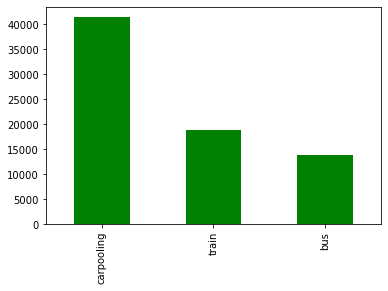

In [22]:
new_df['transport_type'].value_counts().plot.bar(color='g')

We can also plot the most used companies for reservation.

<AxesSubplot:>

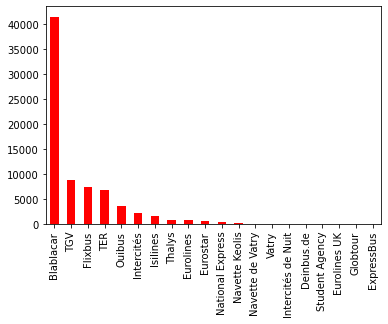

In [21]:
new_df['company'].value_counts().plot.bar(color='r')